# Library

In [3]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression, Lasso, Ridge

from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

# Undefitting and Overfitting : KNN

> ## Table Of Contents

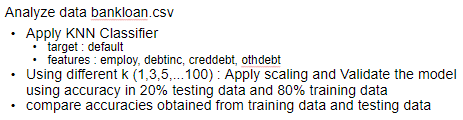

> ## Dataset : Bankloan Dataset

In [4]:
bankloan = pd.read_csv('bankloan.csv')

In [5]:
fitur = ['employ', 'debtinc', 'creddebt', 'othdebt']
target = ['default']

In [6]:
X = bankloan[fitur]
y = bankloan[target]

> ## Data Splitting

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    stratify = y, # stratified random sampling
    test_size = 0.2,
    random_state = 2020) # make the result consistent

> ## Standardization Process

In [8]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

> ## Selection process of Factor k

In [9]:
k = range(1,100,2)
testing_accuracies = []
training_accuracies = []
score = 0

for i in k:
  knn = KNeighborsClassifier(n_neighbors = i)
  knn.fit(X_train_scaled,y_train)

  y_predict_train = knn.predict(X_train_scaled)
  training_accuracies.append(accuracy_score(y_train,y_predict_train))

  y_predict_test = knn.predict(X_test_scaled)
  acc_score = accuracy_score(y_test,y_predict_test)
  testing_accuracies.append(acc_score)

  if score < acc_score:
    score = acc_score
    best_k = i

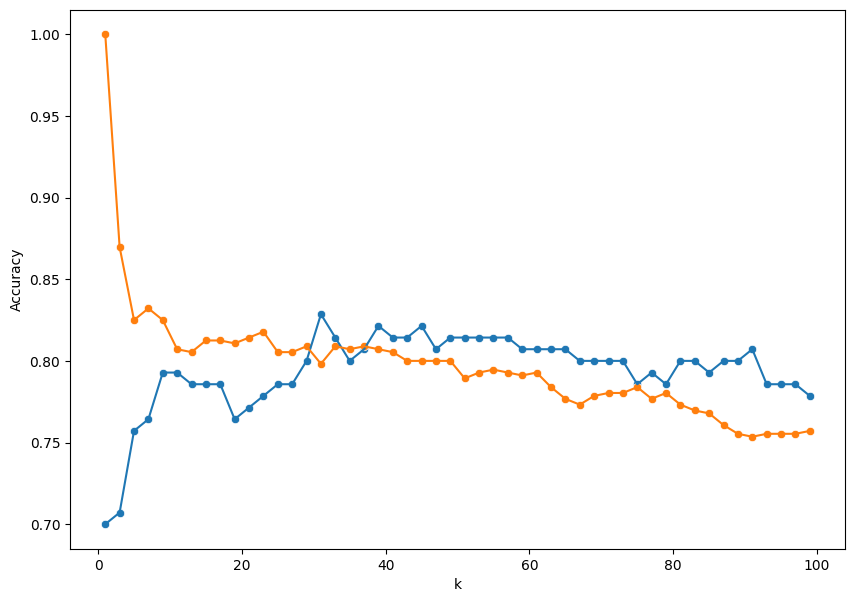

In [14]:
plt.figure(figsize=(10,7))

sns.lineplot(x=k, y=testing_accuracies)
sns.scatterplot(x=k, y=testing_accuracies)

sns.lineplot(x=k, y=training_accuracies)
sns.scatterplot(x=k, y=training_accuracies)

plt.xlabel("k")
plt.ylabel("Accuracy")
plt.show()

In [15]:
print('best k:', best_k)
print('accuracy:', score)

best k: 31
accuracy: 0.8285714285714286


1. The best factor k for this case is 31 with 82.86 % accuracy
1. For k = 1, the KNN method achieve 100 accuracy in training set but very bad accuracy in validation set
1. For k below 31, the ML method is getting overfitting while for k greater than 31 the ML method is getting underfitting

# Model Complexity : Decision Tree

> ## Table Of Contents

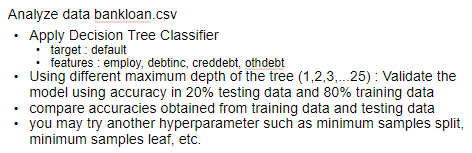

> ## Selection Process of Maximum Depth

In [16]:
depths = range(1,25)
testing_accuracies = []
training_accuracies = []
score = 0

for i in depths:
  tree = DecisionTreeClassifier(
      criterion = 'entropy',
      max_depth = i)
  tree.fit(X_train,y_train)

  y_predict_train = tree.predict(X_train)
  training_accuracies.append(accuracy_score(y_train,y_predict_train))

  y_predict_test = tree.predict(X_test)
  acc_score = accuracy_score(y_test,y_predict_test)
  testing_accuracies.append(acc_score)

  if score < acc_score:
    best_depth = i
    score = acc_score

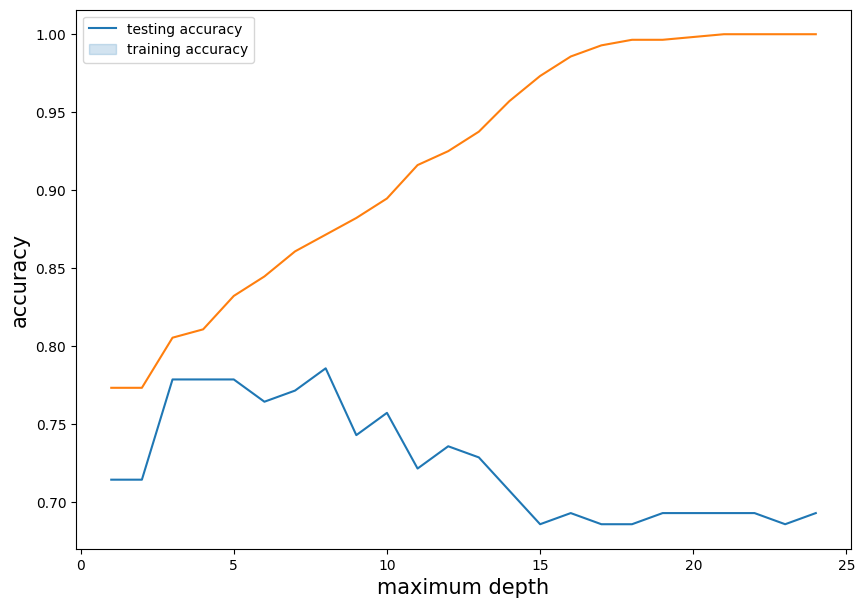

In [19]:
plt.figure(figsize=(10,7))

sns.lineplot(x=depths, y=testing_accuracies)
sns.lineplot(x=depths, y=training_accuracies)

plt.legend(['testing accuracy', 'training accuracy'])
plt.xlabel('maximum depth', fontsize=15)
plt.ylabel('accuracy', fontsize=15)
plt.show()

In [20]:
print('best maximum depth:', best_depth)
print('accuracy:', score)

best maximum depth: 8
accuracy: 0.7857142857142857


1. The best maximum depth for this case is 8 with 78.57 % accuracy.
1. The deeper the tree, the ML method getting overfitting
1. when the max depth 25, the accuracy in training set almost 100% while in test set the accuracy is very bad.

> ## Exercise : Try different value of minimum samples split or minimum samples leaf

# Model Complexity : Linear Model Regression

> ## Data

In [26]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
X = data.data
y = data.target

In [27]:
housing.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [28]:
print(housing['DESCR'])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [29]:
X = pd.DataFrame(data = housing['data'], columns = housing['feature_names'])
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [30]:
y = pd.Series(housing['target'])

In [31]:
y.head()

,0
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


> ## Data Splitting

In [32]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = 0.2,
    random_state = 1899) # make the result consistent

> ## Ridge Regression

In [33]:
hyperparam_c = [100000, 10000, 1000, 100, 10, 1, 0.1, 0.001]
testing_mse = []
training_mse = []
score = 0

for i in hyperparam_c:
  ridgereg = Ridge(alpha = i)
  ridgereg.fit(X_train,y_train)

  y_predict_train = ridgereg.predict(X_train)
  training_mse.append(mean_squared_error(y_train,y_predict_train))

  y_predict_test = ridgereg.predict(X_test)
  mse_score = mean_squared_error(y_test,y_predict_test)
  testing_mse.append(mse_score)

  if score > -mse_score:
    score = mse_score
    best_c = i

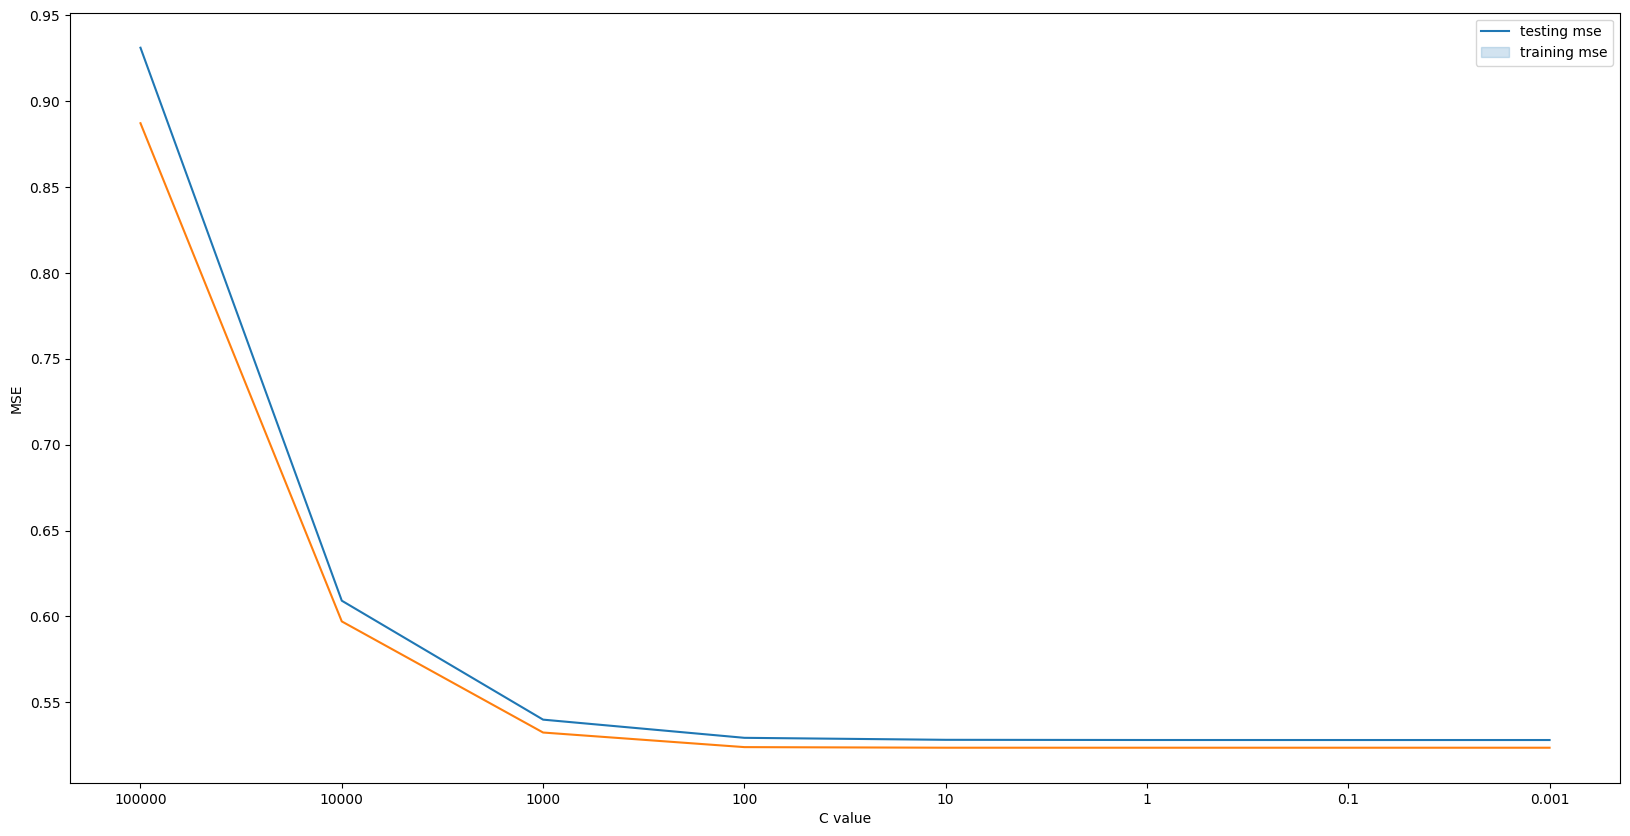

In [35]:
length = range(len(hyperparam_c))

plt.figure(figsize=(20,10))

sns.lineplot(x=length, y=testing_mse)
sns.lineplot(x=length, y=training_mse)

plt.legend(['testing mse', 'training mse'])
plt.xticks(length, hyperparam_c)
plt.xlabel("C value")
plt.ylabel("MSE")
plt.show()

In [36]:
print('best c:', best_c)
print('mse:', score)

best c: 0.001
mse: 0.5280450580716682


In [37]:
ridgereg = Ridge(alpha=best_c)
ridgereg.fit(X_train, y_train)

Ridge(alpha=0.001)

In [38]:
y_reg_train = ridgereg.predict(X_train)
y_reg_test = ridgereg.predict(X_test)

In [39]:
coef_ridgereg = pd.DataFrame({
    'feature_names':list(X),
    'feature coef':ridgereg.coef_
})

In [40]:
coef_ridgereg

,feature_names,feature coef
0,MedInc,0.432896
1,HouseAge,0.009215
2,AveRooms,-0.104656
3,AveBedrms,0.610906
4,Population,-0.000005
5,AveOccup,-0.003816
6,Latitude,-0.422515
7,Longitude,-0.435663


In [41]:
print('mse train:',mean_squared_error(y_train,y_reg_train))
print('mse test:',mean_squared_error(y_test,y_reg_test))

mse train: 0.5235619411442614
mse test: 0.5280450580716682


1. When alpha set to high value the model is very underfitting becasue both mse in training set and test set are large and it also means that the model is too simple
1. lower alpha can decrese the mse for both training set  and test set until mse in training slighly lower than mse in test set
1. the best alpha for this case is 0.001 with 28.778 mse

> ## Lasso Regression

In [42]:
hyperparam_c = [100000, 10000, 1000, 100, 10, 1, 0.1, 0.001]
testing_mse = []
training_mse = []
score = 0

for i in hyperparam_c:
  lassoreg = Lasso(alpha = i)
  lassoreg.fit(X_train,y_train)

  y_predict_train = lassoreg.predict(X_train)
  training_mse.append(mean_squared_error(y_train,y_predict_train))

  y_predict_test = lassoreg.predict(X_test)
  mse_score = mean_squared_error(y_test,y_predict_test)
  testing_mse.append(mse_score)

  if score > -mse_score:
    score = mse_score
    best_c = i

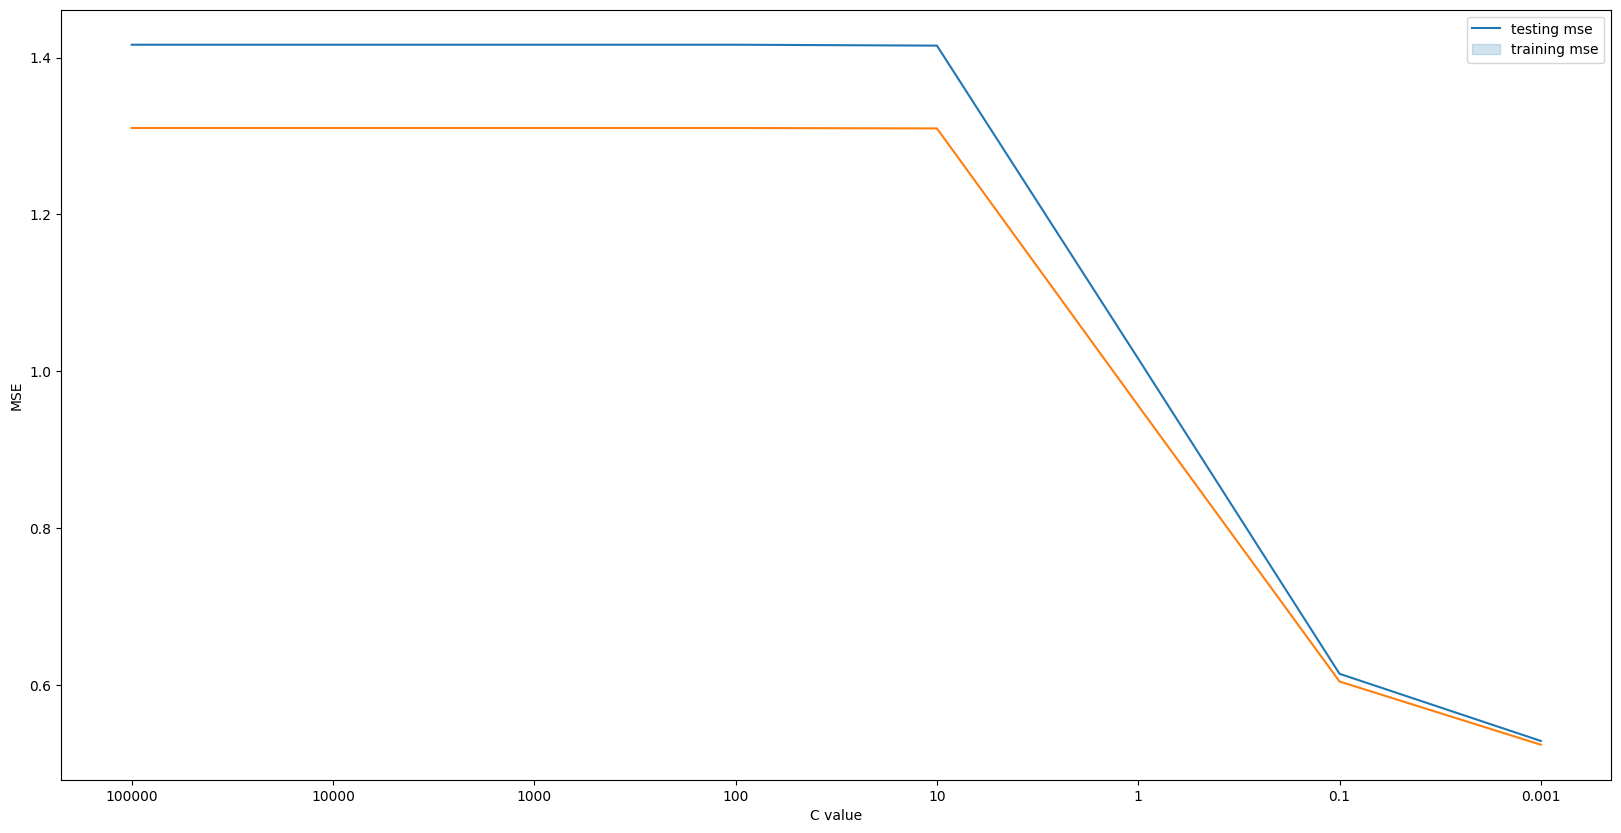

In [44]:
length = range(len(hyperparam_c))

plt.figure(figsize=(20,10))

sns.lineplot(x=length, y=testing_mse)
sns.lineplot(x=length, y=training_mse)

plt.legend(['testing mse', 'training mse'])
plt.xticks(length, hyperparam_c)
plt.xlabel("C value")
plt.ylabel("MSE")
plt.show()

In [45]:
print('best c:', best_c)
print('mse:', score)

best c: 0.001
mse: 0.5284305953974503


In [46]:
lassoreg = Lasso(alpha=best_c)
lassoreg.fit(X_train, y_train)

Lasso(alpha=0.001)

In [47]:
y_reg_train = lassoreg.predict(X_train)
y_reg_test = lassoreg.predict(X_test)

In [48]:
coef_lassoreg = pd.DataFrame({
    'feature_names':list(X),
    'feature coef':lassoreg.coef_
})

In [49]:
coef_lassoreg

,feature_names,feature coef
0,MedInc,0.429355
1,HouseAge,0.009283
2,AveRooms,-0.097851
3,AveBedrms,0.575797
4,Population,-0.000004
5,AveOccup,-0.003801
6,Latitude,-0.421212
7,Longitude,-0.433817


In [50]:
print('mse train:',mean_squared_error(y_train,y_reg_train))
print('mse test:',mean_squared_error(y_test,y_reg_test))

mse train: 0.5236104846208471
mse test: 0.5284305953974503


1. When alpha set to high value the model is very underfitting becasue both mse in training set and test set are large and it also means that the model is too simple
1. lower alpha can decrese the mse for both training set  and test set until mse in training slighly lower than mse in test set
1. the best alpha for this case is 0.001 with 28.8205 mse